<h1>Optimization of a Multivariate Function</h1> by Dave Montgomery

<br>
### Want to find the minimums of the function: 
$$ f: \mathbb{R}^2 \rightarrow \mathbb{R}$$

$$f(x,y)=\frac{1}{2}(x^4+y^4)-2xy-1$$


### Why I chose this function:
- It is at least twice differentiable.
- It has a saddle point.
- The true minimums can be found analytically for ease of analysis.

<br>
### Finding the critcal points

The first partials are:
$$ f_x = 2x^3-2y \hspace{20mm} f_y = 2y^3-2x $$ 

<br>
Setting each partial equal to zero yeilds the following system:

$$ x^3 = y \hspace{20mm} x = y^3 $$

<br>
After some algebra we find that the critical points are $(-1,-1, -2), \:(0,0, -1), \:(1,1, -2)$.  Using the _Second Partials Test_ we can observe the following:
- The function has minimums at the points $(-1,-1, -2)$ and $(1,1, -2)$
- The function has a saddle point at $(0,0, -1)$

<br>
### Packages:

In [1]:
%matplotlib notebook                                                             
import numpy as np                                                               # arrays, matrices etc.
from matplotlib import pyplot, cm                                                # plotting
from mpl_toolkits.mplot3d import Axes3D                                          # 3D plotting
from __future__ import print_function                                            # enables sliders
from ipywidgets import interact, widgets                                         # '             '

### Setting a Tolerance
Do not use a tolerance $< 0.5$e$-08$ . For example, $0.5$e$-9$ will cause problems.

In [81]:
tol = 0.5e-07 

### Plotting the function:

<IPython.core.display.Javascript object>


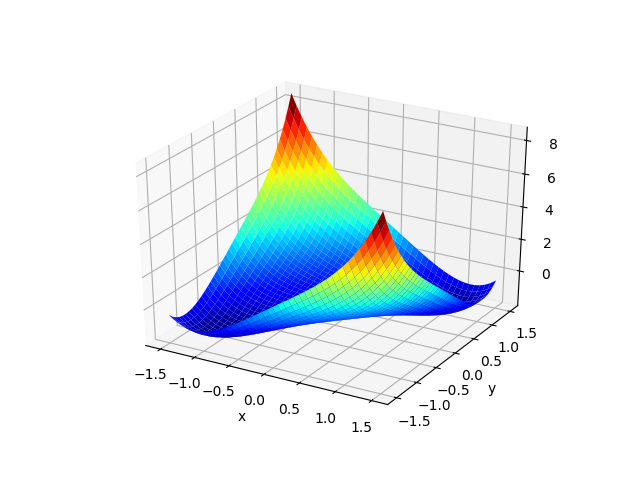

In [10]:
def F(x):
    return 1.0/2.0 * (x[0]**4 + x[1]**4) - 2.0 * x[0] * x[1] - 1

n = 201
min = -1.5; max = 1.5

x = np.linspace(min, max, n)
y = np.linspace(min, max, n)
Z = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        
        Z[i,j] = F([x[i], y[j]])

X,Y = np.meshgrid(x,y)

fig = pyplot.figure()
ax1 = fig.add_subplot(111, projection='3d')
p1 = ax1.plot_surface(X,Y,Z,cmap=cm.jet)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

## Optimization Techniques for Multivariate Functions:

### 1) Multivariate Newtons Method
   - Need Gradient, Hessian, and a good initial guess.
   
### 2) Gradient Search (aka Steepest Descent)
   - Need Gradient, a good initial guess, and must mininimize our step size in search direction using a line search.

### 3) Conjugate Gradient Search
   - Need Gradient, a good initial guess, and must mininimize our step size in search direction using a line search.

<br>
## Determining the Gradient and the Hessian:

$$ \nabla f(x,y) = (2x^3 -2y \hspace{2mm},\hspace{2mm} 2y^3 - 2x) $$

$$
    H(x,y) =         
            \begin{bmatrix}
                6x^2 & -2 \\
                -2 & 6y^2
            \end{bmatrix} 
$$



In [3]:
# Gradient of f
def J(x):
    return np.array([2.0 * x[0] ** 3 - 2.0 * x[1], 2.0 * x[1] ** 3 - 2.0 * x[0]])

# Hessian of f
def H(x): 
    return np.array([[6.0 * x[0] ** 2, -2.0], 
                     [-2.0, 6.0 * x[1] ** 2] ])

## Multivariate Newtons Method:
$$\begin{cases}
H(x,y) \textbf{v} = -\nabla f(x,y)\\ 
\textbf{w}_{k+1} = \textbf{w}_{k} + \textbf{v}     
\end{cases}
$$

Where $\textbf{w}_{k+1}$ is the approximation of the minimum.  

Use the sliders below to change the initial guess $\textbf{w}_{0}=(x,y)$.  Note that the output will be (array$([x^\ast, y^\ast])$, number of iterations), where the approximate minimum is the point $(x^\ast, y^\ast, f(x^\ast, y^\ast))$ 


In [80]:
def Newtons(x,y, tol):
    w = np.array([x, y])
    v = np.linalg.solve(np.multiply(-1,H(w)),J(w)) 
    n = 0
    while np.linalg.norm(v) > tol:
        n += 1
        w += v
        v = np.linalg.solve(np.multiply(-1,H(w)),J(w))
        if n == 1000:
            break
    
    return w, n

# Creating Sliders
step = 0.01 
interact(Newtons, x = (min, max, step), y = (min, max, step), tol = tol)

<function __main__.Newtons>

### Observations
- Gets hung up on the saddle point (0,0,0)
- Diverges for a large range of inputs if we fix the other input at zero. Example $w_0 = (.73, 0)$
- Fails if $\textbf{w}_0 = (1.36,0)^T$

## Line Search Methods

For the Gradient Search and Conjugate Gradient Search Methods, we will utilize the following line search methods to minimize the function 

$$h(\alpha) = f(\textbf{w} + \alpha \textbf{d}) \hspace{5mm}, \hspace{5mm} \alpha \in \mathbb{R}^+$$

In [99]:
# Golden Section Search
def GSS(a,b,f,tol):
    g = (np.sqrt(5.0)-1.0)/2.0
    x1 = a + (1.0-g)*(b-a)
    x2 = a + g*(b-a)
    f1 = f(x1)
    f2 = f(x2)
    while np.linalg.norm(x1-x2) > tol:
        if f1 < f2:
            b=x2
            x2=x1
            x1=a+(1.0-g)*(b-a)
            f2=f1
            f1=f(x1)
        else:
            a=x1
            x1=x2
            x2=a+g*(b-a)
            f1=f2
            f2=f(x2)
    return (a+b)/2.0

# Successive Parabolic Interpolation
def SPI(x, f, tol):
    r = x[0]; s = x[1]; t = x[2]
    fr = f(r); ft = f(t); fs = f(s)
    while abs(r-s) > tol:
        d = 2*((s-r)*(ft-fs) - (fs - fr)*(t-s))
        
        if   d == 0: # Avoid Dividing by Zero
            break
        else:
            x = (r+s)/2 - (fs - fr)*(t-r)*(t-s)/d

            t = s; s = r; r = x
            ft = fs; fs = fr; fr = f(r)
    return x

## Gradient Search aka Steepest Descent

For this method we will utilize the Golden Section Search to minimize the step length.

### Algorithm and Details:

- Determine initial guess $\textbf{w}_0$ . $\hspace{5mm}$_Stop if $\nabla f(\textbf{w}_0) = 0$_.
<br><br>

for k = 0, 1, 2, 3, ...
1. $\textbf{v}_k = -\nabla f(\textbf{w}_k)$
<br><br>
2. Let $\textbf{p}_k $ be the vector that minimizes $ f(\textbf{w}_k+ s \textbf{v}_k)$ on the interval $[\textbf{w}_k, \textbf{w}_k + \textbf{v}_k]$, where the scalar $s$ is the step size, and $0<s<1$.  We will find $\textbf{p}_k $ using the Golden Section Search. 
   
   Since $\textbf{p}_k$ minimizes $f(\textbf{w}_k+ s \textbf{v}_k)$, then $\textbf{p}_k = \textbf{w}_k+ s \textbf{v}_k$ 
   
   Solving for $s$:
   $$\textbf{p}_k - \textbf{w}_k =  s \textbf{v}_k$$
   
   $$\|\textbf{p}_k - \textbf{w}_k \|_2 = s \| \textbf{v}_k\|_2$$
   
   $$s = \frac{\|\textbf{p}_k - \textbf{w}_k \|_2}{\| \textbf{v}_k\|_2}$$
   
3. Let $s = \displaystyle\frac{\|\textbf{p}_k - \textbf{w}_k \|_2}{\| \textbf{v}_k\|_2}$<br>
<br>
4. Repeat steps 1 $\rightarrow$ 2 . Break when $\|\textbf{v}_k\|_2$ $<$ tolerance
   


In [84]:
def Gradient_Search(x,y, tol):
    w = np.array([x,y])
    v = -1*J(w)
    p = GSS(w, w + v, F, 0.5e-14)
    s = np.linalg.norm(p-w)/np.linalg.norm(v)
    n = 0
    while np.linalg.norm(v)>tol:
        n += 1
        w += s*v
        v = -1*J(w)
        p = GSS(w,w+v,F,0.5e-14)
        s = np.linalg.norm(p-w)/np.linalg.norm(v)
        if n == 5000:
            break
    return w, n


# Creating Sliders
interact(Gradient_Search, x = (min, max, step), y = (min, max, step), tol = tol)

<function __main__.Gradient_Search>

## Conjugate Gradient Search

- Determine initial guess $\textbf{w}_0$.
<br><br>
- Set $\textbf{d}_0 = \textbf{r}_0 = - \nabla f(\textbf{w}_0)$
<br><br>

For k = 0, 1, 2, ...
1. Let $\:h(\alpha_k) = f(\textbf{w}_{k}+ \alpha_k \textbf{d}_{k})$.  The goal of this step is to minimize $h(\alpha_k)$ on the interval $[0,1]$, where $\alpha_k \in \mathbb{R}^+$ represents the step size in the search direction $d_k$.  While it is possible to use the Golden Search, we found the convergence rate to me much faster with Successive Parabolic Interpolation.
<br><br>
2. $\textbf{w}_{k+1} =  \textbf{w}_{k} + \alpha_k \textbf{d}_{k}$
<br><br>
3. $\textbf{r}_{k+1} = - \nabla f(\textbf{w}_{k+1})$
<br><br>
4. $\beta_{k} = \displaystyle \frac{\textbf{r}_{k+1}^T\textbf{r}_{k+1}}{\textbf{r}_{k}^T\textbf{r}_{k}}$
<br><br>
5. $\textbf{d}_{k+1} = \textbf{r}_{k+1} + \beta_{k} \textbf{d}_{k}$
<br><br>
6. Break when $\|r_{k+1}\|<tolerance$


#### A few details about the algorithm.
From the Conjugate Gradient Method (_Matrix Algebra Iterative Technique_) we have that matrix $A$ is symmetric and positive-definite (_SPD_).  The vectors $\textbf{r}_k$ are the residual vectors, and the vectors $\textbf{d}_k$ are chosen from the vector space span of the previous residuals.  Furthermore, $\alpha_k$ is chosen such that the new residual $\textbf{r}_{k+1}$ is orthogonal to the dierction $\textbf{d}_k$.  That is $\textbf{r}_{k+1}^T\textbf{d}_k = 0$

From the Conjugate Gradient Method, we have <br><br> $$\hspace{1mm} \beta_k = - \displaystyle\frac{\textbf{d}_k^T A \textbf{r}_{k+1}}{\textbf{d}_k^T A \textbf{d}_k} \hspace{20mm} \displaystyle\alpha_k = \frac{\textbf{r}_k^T\textbf{r}_k}{\textbf{d}_k^T A \textbf{d}_k} \hspace{20mm} \textbf{r}_{k+1} = \textbf{r}_k - \alpha_k A \textbf{d}_k = - \nabla f$$  

To find $\beta_k$ in terms not including $A$, we have the following: 
<br><br>

$$\begin{align}\beta_k &= - \frac{\textbf{d}_k^T A \textbf{r}_{k+1}}{\textbf{d}_k^T A \textbf{d}_k} & \\\\
&= - \frac{\textbf{d}_k^T A^T \textbf{r}_{k+1}}{\textbf{d}_k^T A \textbf{d}_k} \hspace{32mm}since \: A = A^T. \\\\
&= - \frac{(A\textbf{d}_k)^T \textbf{r}_{k+1}}{\textbf{d}_k^T A \textbf{d}_k} \\\\
&= - \frac{\textbf{r}_{k+1}^T(A\textbf{d}_k)}{\textbf{d}_k^T A \textbf{d}_k} \hspace{30mm} by\: properties \: of \: inner \: products \\\\
&=-\frac{\textbf{r}_{k+1}^T(A\textbf{d}_k)}{\displaystyle\frac{\textbf{r}_k^T\textbf{r}_k}{\alpha_k}} \hspace{30mm} since\: \alpha_k = \frac{\textbf{r}_k^T\textbf{r}_k}{\textbf{d}_k^T A \textbf{d}_k}\\\\
&=\frac{-\big(\displaystyle\frac{\textbf{r}_k - \textbf{r}_{k+1}}{\alpha_k}\big)^T \textbf{r}_{k+1}}{\displaystyle\frac{\textbf{r}_k^T\textbf{r}_k}{\alpha_k}} \hspace{14mm} since\: \textbf{r}_{k+1} = \textbf{r}_k - \alpha_k A \textbf{d}_k\\\\
&= \frac{(\textbf{r}_{k+1}^T - \textbf{r}_{k}^T) \textbf{r}_{k+1}}{\textbf{r}_k^T\textbf{r}_k^T} \hspace{20mm}\:by\:properties\:of\:transposes\\\\
&= \frac{\textbf{r}_{k+1}^T\textbf{r}_{k+1}}{\textbf{r}_k^T\textbf{r}_k^T} \hspace{32mm}\:\:since\: \textbf{r}_k^T\textbf{r}_{k+1} = 0
\end{align}$$ 
<br><br>
Thus, $\:\beta_k = \displaystyle\frac{\textbf{r}_{k+1}^T\textbf{r}_{k+1}}{\textbf{r}_k^T\textbf{r}_k^T}$




In [86]:
# Conjugate Gradient Search with SPI
def Conj_Grad_Search(x,y, tol):  
    w = np.array([x,y])
    d = -1*J(w)
    r0 = d
    n = 0
    interval = np.array([[0], [.5], [1]]) # for minimizing h(a)
    while np.linalg.norm(r0) > tol:
        w0 = w
        n += 1
        def h(a):
            return F(w0 + a*d)
        a = SPI(interval, h, 0.5e-14)
        w = w0 + a * d
        r1 = -1*J(w)
        B = r1 * r1.T / (r0 * r0.T)
        d = r1 + B*d
        r0 = r1
        if n == 1000:
            break
    return w, n

# Creating Sliders
interact(Conj_Grad_Search, x = (min, max, step), y = (min, max, step), tol = tol)

<function __main__.Conj_Grad_Search>

## Comparing the Three Methods

We will first look a few specific examples.  Feel free to adjust the tolerance, "tol", but note that this code cannot handle precision greater than $0.5$e$-08$.

In [92]:
tol = 0.5e-7

w0 = np.array([[-.5, -.5],
               [.1, -.5],
               [1.1, -.1]])
print('Tolerance = ',tol, '\n')
for i in range(len(w0)):
    print('w0 = ',w0[i,:])
    w_N, n_N = Newtons(w0[i,0],w0[i,1], tol)
    w_SD, n_SD = Gradient_Search(w0[i,0],w0[i,1], tol)
    w_CGS, n_CGS = Conj_Grad_Search(w0[i,0],w0[i,1], tol)
    print('{:<45}{:<37}{:<40}'.format('Newtons', 'Gradient Search', 'Conjucate Gradient Search'),
        '\nw = {:<40} w = {:<32} w = {:<35}'.format(np.array_str(w_N, precision = 10),
                                                  np.array_str(w_SD, precision = 10),
                                                  np.array_str(w_CGS, precision = 10)),
        '\nn = {:<40} n = {:<32} n = {:<35}'.format(n_N, n_SD, n_CGS),
        '\n||J(w)|| = {:<33} ||J(w)|| = {:<25} ||J(w)|| = {:<25}\n'.format(np.linalg.norm(J(w_N)),
                                                                       np.linalg.norm(J(w_SD)),
                                                                       np.linalg.norm(J(w_CGS))))

Tolerance =  5e-08 

w0 =  [-0.5 -0.5]
Newtons                                      Gradient Search                      Conjucate Gradient Search                
w = [ 1.  1.]                                w = [-1.0000000043 -1.0000000043]    w = [-1.0000000005 -1.0000000005]       
n = 1                                        n = 1                                n = 1                                   
||J(w)|| = 0.0                               ||J(w)|| = 2.433348384792412e-08     ||J(w)|| = 2.639162133431723e-09    

w0 =  [ 0.1 -0.5]
Newtons                                      Gradient Search                      Conjucate Gradient Search                
w = [  0.0000000000e+00  -7.1471033862e-13]  w = [-0.9999999957 -1.0000000043]    w = [-0.9999999934 -1.0000000001]       
n = 4                                        n = 16                               n = 20                                  
||J(w)|| = 1.4294206772333226e-12            ||J(w)|| = 4.892902725739635e-08     |

### Newton's
- Fastest Convergence
- Gets hung up on the saddle point

### Steepest Descent
- Does not get hung up on the saddle point.
- Much slower convergence than Multivariate Newtons Methods. 
- Very slow convergence for precision greater than 0.5e-7 (_try tol = 0.5e-8 by scrolling to very top of document_)

### Conjugate Gradient
- Generally slower than Newton's, but much faster than Steepest Descent for higher tolerances (_ie greater than 0.5e-7)

## Creating a Plot of Convergence as a Function of Initial Guess

We know that the point $w^\ast = (1,1)$ is associated with the minimum of the function $f$. We can create a plot of convergence as a function of how far our initial guess is away from the minimum.  That is: $n\hspace{1mm}(\|w_0-w^\ast\|_2)$

In [128]:
tol = 0.5e-7
x = np.linspace(.20,.99, 80)
y = np.linspace(1.80, 1.01, 80)
w0 = np.zeros((len(x), 2))
w0[:, 0] = x
w0[:, 1] = y
dist = np.zeros(len(x))
n_N = np.zeros(len(x))
n_SD = np.zeros(len(x))
n_CGS = np.zeros(len(x))

for i in range(len(w0)):
    dist[i] = np.linalg.norm(w0[i,:] - [1,1])
    w_N, n_N[i] = Newtons(w0[i,0],w0[i,1], tol)
    w_SD, n_SD[i] = Gradient_Search(w0[i,0],w0[i,1], tol)
    w_CGS, n_CGS[i] = Conj_Grad_Search(w0[i,0],w0[i,1], tol)

    # Uncomment if you want to see what the approximation is converging to for each w0
#     print('w0 = ', w0[i, :])
#     print('{:<45}{:<37}{:<40}'.format('Newtons', 'Gradient Search', 'Conjucate Gradient Search'),
#           '\nw = {:<40} w = {:<32} w = {:<35}'.format(np.array_str(w_N, precision=10),
#                                                       np.array_str(w_SD, precision=10),
#                                                       np.array_str(w_CGS, precision=10)),
#           '\nn = {:<40} n = {:<32} n = {:<35}'.format(n_N[i], n_SD[i], n_CGS[i]),
#           '\n||J(w)|| = {:<33} ||J(w)|| = {:<25} ||J(w)|| = {:<25}\n'.format(np.linalg.norm(J(w_N)),
#                                                                              np.linalg.norm(J(w_SD)),
#                                                                              np.linalg.norm(J(w_CGS))))

<IPython.core.display.Javascript object>


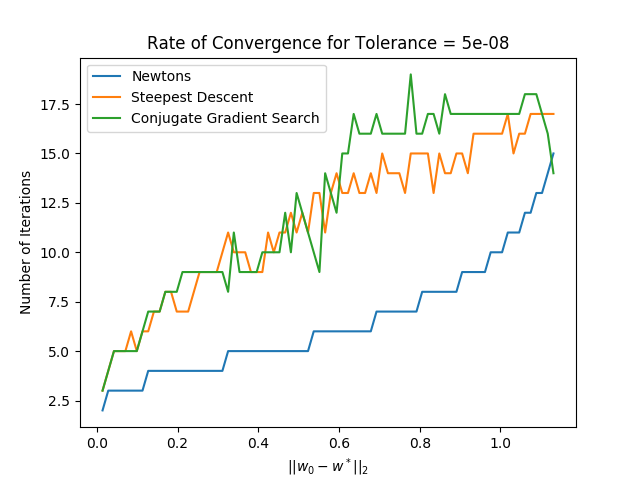

In [124]:
fig , ax = pyplot.subplots()
ax.plot(dist,n_N, label = 'Newtons')
ax.plot(dist,n_SD, label = 'Steepest Descent')
ax.plot(dist,n_CGS, label = 'Conjugate Gradient Search')
ax.legend()
ax.set_xlabel('$||w_0 - w^*||_2$')
ax.set_ylabel('Number of Iterations')
ax.set_title('Rate of Convergence for Tolerance = {:}'.format(tol))
pyplot.show()

## Conclusion

From our analysis we can see that when a Hessian is availble, the Multivariate Newtons Method is a great choice, so long as the minimum is not too close to a saddle point.  Otherwise, if you want the best precision with the fewest number of iterations, the Conjugate Gradient Search is the method for you.  

### References
Sauer, Timothy. (2012). "Chapter's 3 & 13". _Numerical Analysis_. Pearson Education, Inc. ISBN: 0-321-78367-0

Burden, Richard L,; Faires, J. Douglas. (2011). "Section 7.6". _Numerical Analysis_. Brooks/Cole, Cengage Learning. ISBN: 0-538-73351-9